In [ ]:
# --- 0. Setup: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
 accuracy_score, classification_report, confusion_matrix,
 roc_curve, roc_auc_score, precision_score, recall_score, f1_score
)

In [ ]:
# Note: MAE, MSE, RMSE, R-squared are for regression tasks and won't be applied here,
# but are crucial for evaluating regression models.
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

In [ ]:
print("--- 1. Data Loading & Initial Inspection ---")

--- 1. Data Loading & Initial Inspection ---


In [ ]:
try:
    # load penguins dataset by seaborn
    import seaborn as sns
    df = sns.load_dataset("penguins")
    print("Dataset loaded successfully from seaborn.")

except Exception as e:
    print(f"Could not load from seaborn: {e}. Trying direct download (ensure URL is correct).")

    # load from direct CSV URL
    import pandas as pd
    df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
    print("Dataset loaded successfully from direct CSV URL.")

# show some row of dataset
print(df.head())

Dataset loaded successfully from seaborn.
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [ ]:
print("\n--- 2. Data Cleaning, Preprocessing & Wrangling ---")


--- 2. Data Cleaning, Preprocessing & Wrangling ---


In [ ]:
# --- Handling Missing Values ---
# For simplicity in this tutorial, we'll drop rows with any missing values.
# In a real-world scenario, you might impute them (e.g., mean, median, mode, or more advanced methods).
df_cleaned = df.dropna().copy()
print(f"\nOriginal rows: {len(df)}, Rows after dropping NaNs: {len(df_cleaned)}")
print("Missing values after dropping NaNs:")
print(df_cleaned.isnull().sum())


Original rows: 344, Rows after dropping NaNs: 333
Missing values after dropping NaNs:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
# --- Feature Engineering (Conceptual) ---
# For this dataset, we won't create complex new features, but it's important
# to understand that this phase is where you might combine features,
# extract information (e.g., from dates), or apply mathematical transformations.
# Example: If we had 'year' and 'month' columns, we could engineer a 'season' feature.
# Or, if these were images, we'd extract features using CNNs.
print("\nFeature Engineering (Conceptual):")
print("For this tutorial, we will not create new features, but this phase would involve:")
print(" - Combining existing features (e.g., ratios, differences)")
print(" - Extracting information (e.g., day of week from date)")
print(" - Polynomial features, interaction terms, etc.")


Feature Engineering (Conceptual):
For this tutorial, we will not create new features, but this phase would involve:
 - Combining existing features (e.g., ratios, differences)
 - Extracting information (e.g., day of week from date)
 - Polynomial features, interaction terms, etc.


In [ ]:
# --- Encoding Categorical Features ---
# 'species' is our target variable (y). 'island' and 'sex' are features (X).
# We need to convert these into numerical representations.
# Encode the target variable 'species'
le = LabelEncoder()
df_cleaned['species_encoded'] = le.fit_transform(df_cleaned['species'])
print(f"\nSpecies mapping: {list(le.classes_)} -> {list(range(len(le.classes_)))}")


Species mapping: ['Adelie', 'Chinstrap', 'Gentoo'] -> [0, 1, 2]


In [ ]:
# Define features (X) and target (y)
X = df_cleaned.drop(['species', 'species_encoded'], axis=1)
y = df_cleaned['species_encoded']

In [ ]:
# Identify categorical and numerical features for preprocessing
categorical_features = ['island', 'sex']
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Suppose you already defined these lists earlier:
# numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
# categorical_features = ['species', 'island', 'sex']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),   # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ]
)

In [ ]:
# --- Train-Test Split ---
# Split the dataset into training and testing sets to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
stratify=y) # stratify for balanced classes
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (266, 6)
Shape of X_test: (67, 6)
Shape of y_train: (266,)
Shape of y_test: (67,)


In [ ]:
# Apply preprocessing to training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Get feature names after one-hot encoding for better interpretability
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

all_feature_names = numerical_features + list(ohe_feature_names)

print("\nX_train_processed (first 5 rows, showing transformed data):")
print(pd.DataFrame(X_train_processed, columns=all_feature_names).head())


X_train_processed (first 5 rows, showing transformed data):
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0        0.167325      -1.992311           0.834781     1.082394   
1        1.227050       1.255521           0.121247    -0.215642   
2        0.879899      -0.520638           1.476961     2.194997   
3       -0.472164       0.646552           0.049894    -0.431982   
4       -1.166467       1.052531          -1.448527    -1.142811   

   island_Biscoe  island_Dream  island_Torgersen  sex_Female  sex_Male  
0            1.0           0.0               0.0         1.0       0.0  
1            0.0           1.0               0.0         0.0       1.0  
2            1.0           0.0               0.0         0.0       1.0  
3            0.0           0.0               1.0         0.0       1.0  
4            0.0           1.0               0.0         1.0       0.0  



--- 3. Exploratory Data Analysis (EDA) ---

Generating Pairplot (relationships between numerical features by species)...


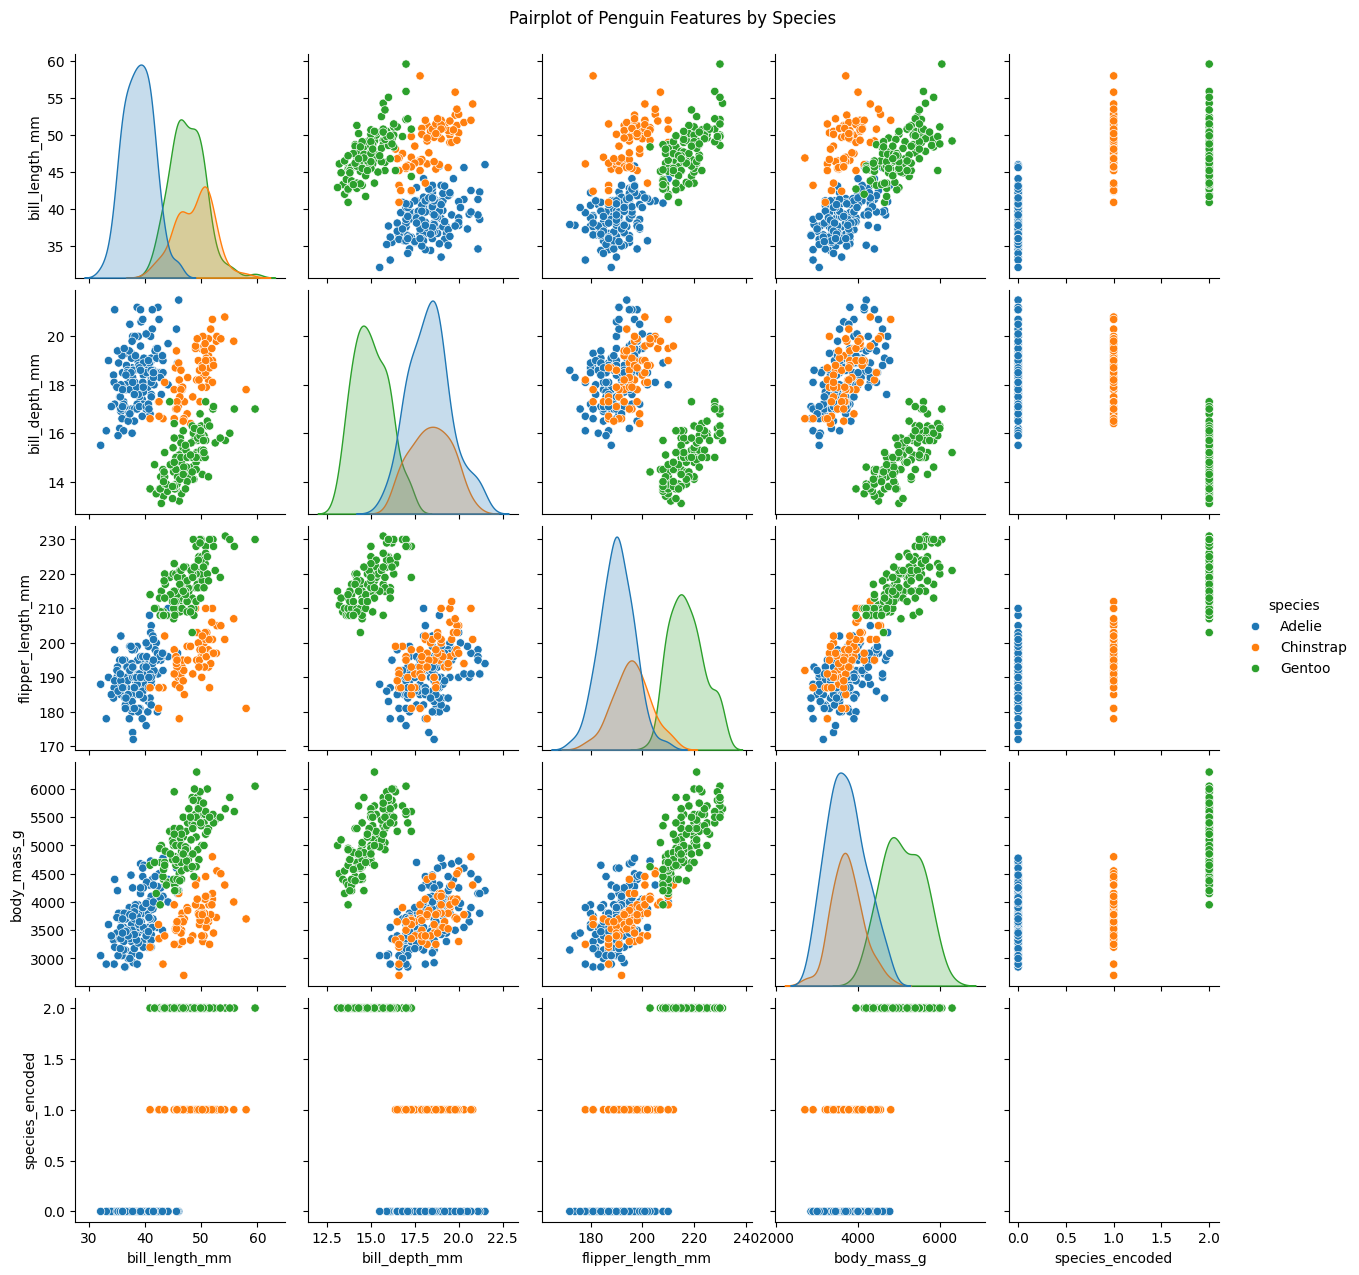

In [ ]:
print("\n--- 3. Exploratory Data Analysis (EDA) ---")
# Pairplot to visualize relationships between numerical features, colored by species
# This might take a moment to generate.
print("\nGenerating Pairplot (relationships between numerical features by species)...")
sns.pairplot(df_cleaned, hue='species', height=2.5, diag_kind='kde')
plt.suptitle('Pairplot of Penguin Features by Species', y=1.02)
plt.show() # Display the plot


Generating Correlation Heatmap for numerical features...


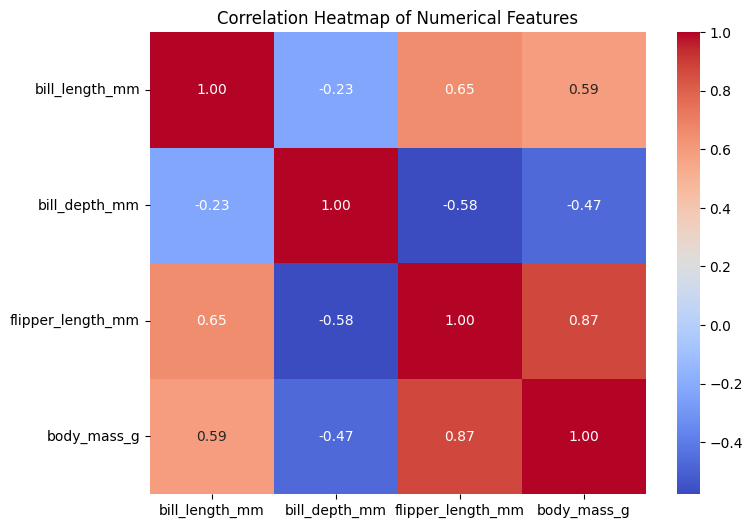

In [ ]:
# Correlation Heatmap for numerical features
print("\nGenerating Correlation Heatmap for numerical features...")
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

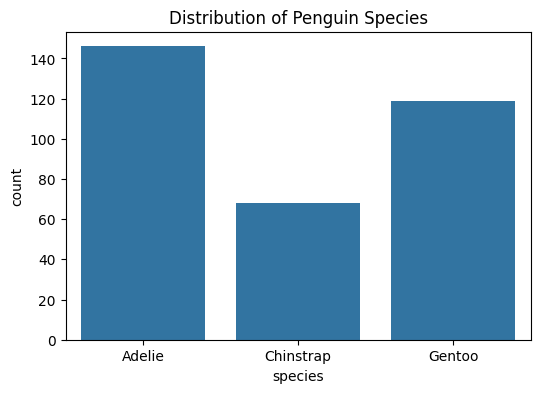

In [ ]:
# Distribution of Species
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df_cleaned)
plt.title('Distribution of Penguin Species')
plt.show()


Generating Boxplots for numerical features by species...


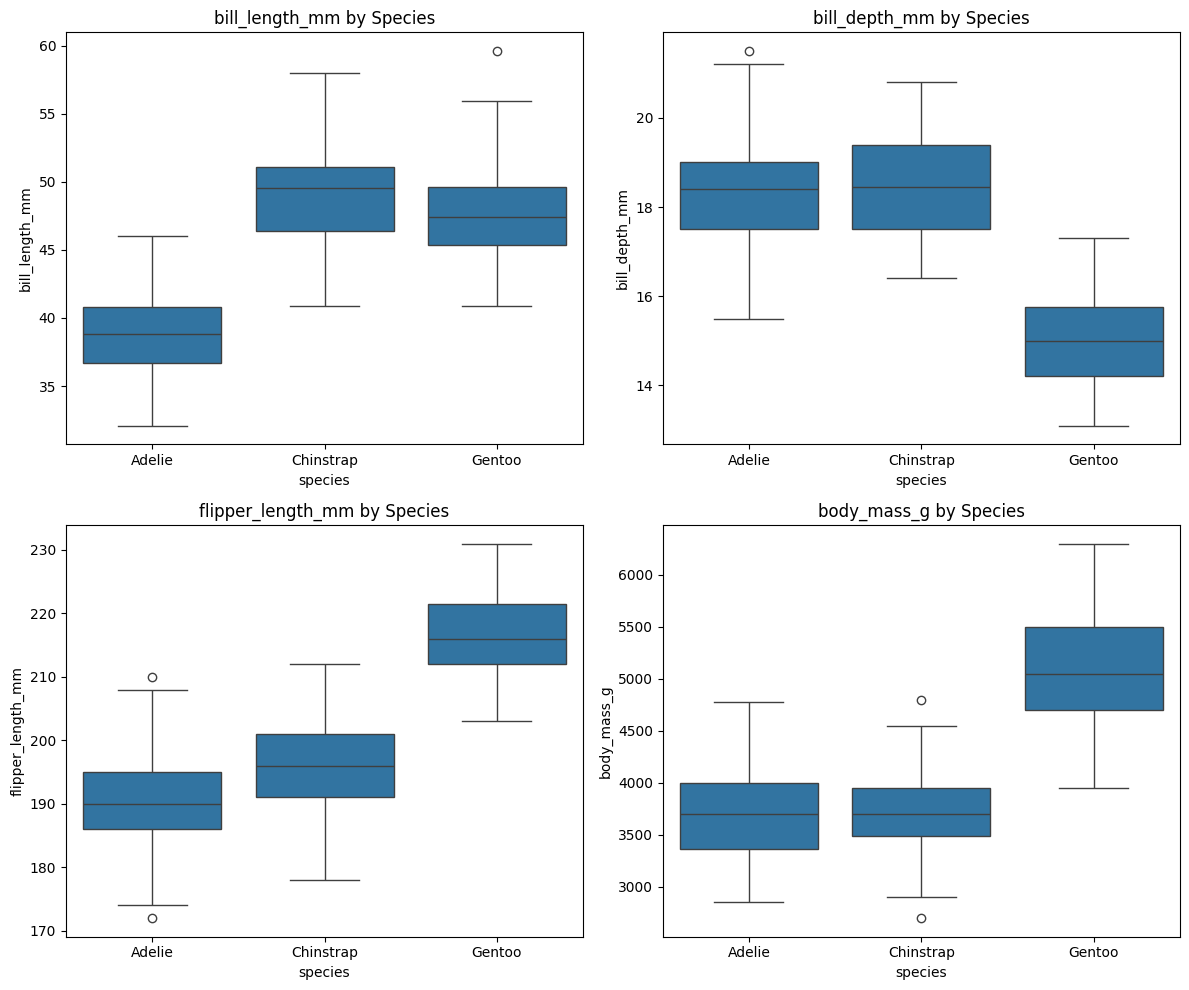

In [ ]:
# Boxplots of numerical features by species
print("\nGenerating Boxplots for numerical features by species...")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(numerical_features):
 row = i // 2
 col = i % 2
 sns.boxplot(x='species', y=feature, data=df_cleaned, ax=axes[row, col])
 axes[row, col].set_title(f'{feature} by Species')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
# Load dataset
df = sns.load_dataset("penguins")

# Drop rows with missing values for simplicity
df = df.dropna()

In [ ]:
# Feature Engineering Examples

# 1. Creating a ratio feature
df["bill_ratio"] = df["bill_length_mm"] / df["bill_depth_mm"]

# 2. Interaction term (multiplying features)
df["length_mass_interaction"] = df["flipper_length_mm"] * df["body_mass_g"]

# 3. Polynomial feature (squared term)
df["bill_length_sq"] = df["bill_length_mm"] ** 2

# 4. Polynomial feature (cubic term)
df["bill_length_cu"] = df["bill_length_mm"] ** 3

# (Optional) Dimensionality Reduction with PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X_scaled = StandardScaler().fit_transform(df[numeric_cols])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)
df["pca1"], df["pca2"] = df_pca[:,0], df_pca[:,1]

# Check new engineered features
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  bill_ratio  length_mass_interaction  bill_length_sq  \
0       3750.0    Male    2.090909                 678750.0         1528.81   
1       3800.0  Female    2.270115                 706800.0         1560.25   
2       3250.0  Female    2.238889                 633750.0         1624.09   
4       3450.0  Female    1.901554                 665850.0         1346.89   
5       3650.0    Male    1.907767                 693500.0         1544.49   

   bill_length_cu      pca1      pca2  
0       59776.471 -1.853593  0.032069  


In [ ]:
print("\n--- 5. Model Training ---")
# Initialize different classifiers
classifiers = {
 'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Support Vector Machine (SVC)': SVC(random_state=42, probability=True), # probability=True for ROC curve
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'K-Nearest Neighbors': KNeighborsClassifier()
}
trained_models = {}
for name, model in classifiers.items():
 print(f"\nTraining {name}...")
 model.fit(X_train_processed, y_train)
 trained_models[name] = model
 print(f"{name} trained.")


--- 5. Model Training ---

Training Logistic Regression...
Logistic Regression trained.

Training Decision Tree...
Decision Tree trained.

Training Random Forest...
Random Forest trained.

Training Support Vector Machine (SVC)...
Support Vector Machine (SVC) trained.

Training Gradient Boosting...
Gradient Boosting trained.

Training K-Nearest Neighbors...
K-Nearest Neighbors trained.


In [ ]:
print("\n--- 6. Model Evaluation ---")
results = {}
plt.figure(figsize=(15, 10)) # Adjust figure size for confusion matrices
plt_idx = 1
for name, model in trained_models.items():
 y_pred = model.predict(X_test_processed)
 accuracy = accuracy_score(y_test, y_pred)
 report = classification_report(y_test, y_pred, target_names=le.classes_)
 cm = confusion_matrix(y_test, y_pred)
 results[name] = {
 'accuracy': accuracy,
 'report': report,
 'confusion_matrix': cm
 }
 print(f"\n--- {name} Performance ---")
 print(f"Accuracy: {accuracy:.4f}")
 print("\nClassification Report:\n", report)


--- 6. Model Evaluation ---

--- Logistic Regression Performance ---
Accuracy: 0.9851

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


--- Decision Tree Performance ---
Accuracy: 0.9254

Classification Report:
               precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67


--- Random Forest Performance ---
Accuracy: 1.00

<Figure size 1500x1000 with 0 Axes>

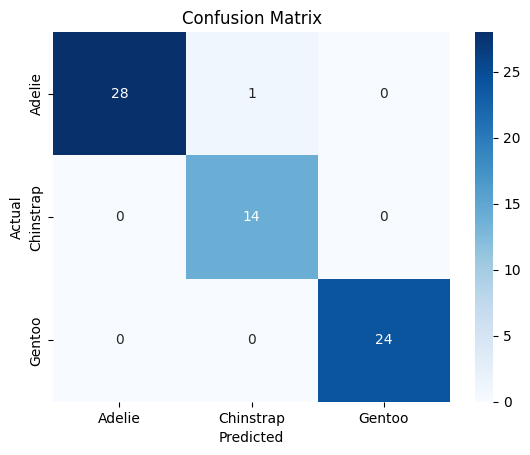

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suppose y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# --- ROC Curve (Multiclass) ---
# For multiclass ROC, a common approach is One-vs-Rest (OvR)
# We calculate ROC for each class against all others.
print("\n--- ROC Curves (One-vs-Rest) ---")
plt.figure(figsize=(10, 8))


--- ROC Curves (One-vs-Rest) ---


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

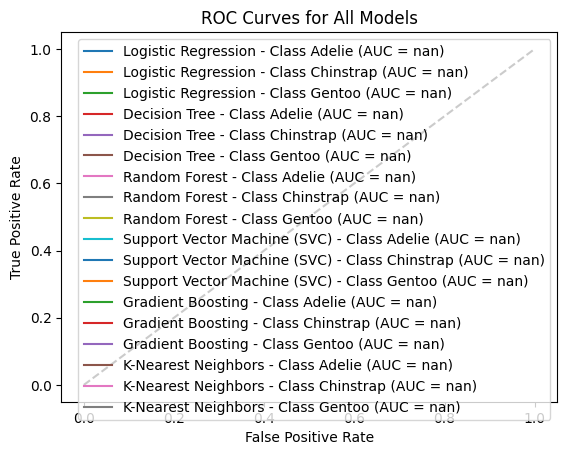

In [ ]:
for name, model in trained_models.items():
    if hasattr(model, "predict_proba"):  # Check if model supports probability prediction
        y_score = model.predict_proba(X_test_processed)
        n_classes = len(le.classes_)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            # Binarize the true labels for One-vs-Rest
            y_test_bin = (y_test == le.classes_[i]).astype(int)
            fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_score[:, i])
            roc_auc[i] = roc_auc_score(y_test_bin, y_score[:, i])

        # Plot all ROC curves for each class for this model
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'{name} - Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

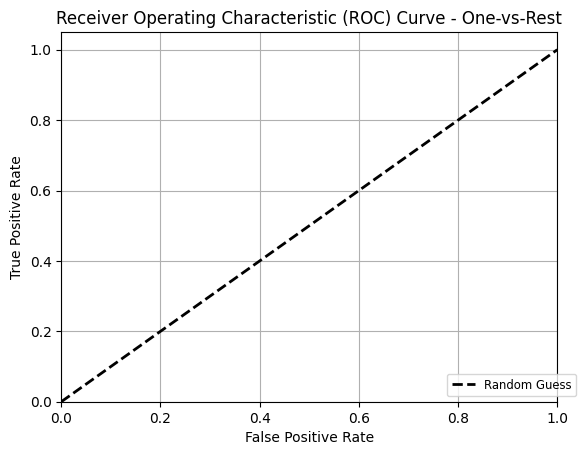


--- Summary of Model Accuracies ---
Logistic Regression: Accuracy = 0.9851
Decision Tree: Accuracy = 0.9254
Random Forest: Accuracy = 1.0000
Support Vector Machine (SVC): Accuracy = 1.0000
Gradient Boosting: Accuracy = 0.9701
K-Nearest Neighbors: Accuracy = 0.9851


In [ ]:
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess') # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc="lower right", bbox_to_anchor=(1.05, 0), fontsize='small', ncol=1)
plt.grid(True)
plt.show()
print("\n--- Summary of Model Accuracies ---")
for name, data in results.items():
 print(f"{name}: Accuracy = {data['accuracy']:.4f}")

In [ ]:
print("\n--- 7. Prediction & Decision Making ---")
# Choose the best performing model. In this case, many models achieved very high accuracy.
# Let's pick Random Forest as an example, as it's robust.
best_model_name = 'Random Forest'
best_model = trained_models[best_model_name]
print(f"\nSelected best model: {best_model_name}")
# --- Example Prediction on unseen data ---
# Let's create a hypothetical new penguin measurement
# (Make sure these values are within a reasonable range for penguins)
new_penguin_data = pd.DataFrame([{
 'bill_length_mm': 39.5,
 'bill_depth_mm': 17.5,
 'flipper_length_mm': 190.0,
 'body_mass_g': 3500.0,
 'island': 'Torgersen',
 'sex': 'Male'
}])


--- 7. Prediction & Decision Making ---

Selected best model: Random Forest


In [ ]:
print("\nNew Penguin Data for Prediction:")
print(new_penguin_data)


New Penguin Data for Prediction:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     island  \
0            39.5           17.5              190.0       3500.0  Torgersen   

    sex  
0  Male  


In [ ]:
# Preprocess the new data using the same preprocessor fitted on training data
new_penguin_processed = preprocessor.transform(new_penguin_data)
# Make a prediction
predicted_species_encoded = best_model.predict(new_penguin_processed)
predicted_species = le.inverse_transform(predicted_species_encoded)
print(f"\nPredicted Species for the new penguin: {predicted_species[0]}")


Predicted Species for the new penguin: Adelie


In [ ]:
# If we want the probability distribution:
if hasattr(best_model, "predict_proba"):
 predicted_proba = best_model.predict_proba(new_penguin_processed)
 proba_df = pd.DataFrame(predicted_proba, columns=le.classes_)
 print("\nPrediction Probabilities:")
 print(proba_df)


Prediction Probabilities:
   Adelie  Chinstrap  Gentoo
0     1.0        0.0     0.0


In [ ]:
# --- Decision Making ---
print("\n--- Decision Making based on Model Results ---")
print("In this scenario, a highly accurate model for penguin species classification can be usedfor:")
print("1. **Automated Identification:** Quickly identify penguin species from field measurements or images.")
print("2. **Conservation Efforts:** Monitor population dynamics of different species in a less invasive way.")
print("3. **Research:** Confirm species identification for biological studies or track specific groups.")
print("4. **Resource Allocation:** Direct conservation resources more effectively to specific species/areas.")
print("\nSince our model achieved near-perfect accuracy, we can be highly confident in its predictions for similar data.")
print("However, always consider:")
print("- **Data Drift:** If penguin characteristics change over time, the model might need retraining.")
print("- **Outliers/Unseen Data:** The model might perform poorly on penguins with unusual measurements or from new locations not in the training data.")
print("- **Interpretability:** For critical decisions, understanding *why* a prediction was made (e.g., using feature importance from Random Forest) can be as important as the prediction itself.")


--- Decision Making based on Model Results ---
In this scenario, a highly accurate model for penguin species classification can be usedfor:
1. **Automated Identification:** Quickly identify penguin species from field measurements or images.
2. **Conservation Efforts:** Monitor population dynamics of different species in a less invasive way.
3. **Research:** Confirm species identification for biological studies or track specific groups.
4. **Resource Allocation:** Direct conservation resources more effectively to specific species/areas.

Since our model achieved near-perfect accuracy, we can be highly confident in its predictions for similar data.
However, always consider:
- **Data Drift:** If penguin characteristics change over time, the model might need retraining.
- **Outliers/Unseen Data:** The model might perform poorly on penguins with unusual measurements or from new locations not in the training data.
- **Interpretability:** For critical decisions, understanding *why* a predict